In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Visualización 

In [22]:
logMc=1.4
q=0.8

df_1 = pd.read_csv("./results/ondas_riroriro_logMc%s_q%s.csv"%(logMc,q))

In [16]:
logMc=1.6
q=0.4

df_2 = pd.read_csv("./results/ondas_riroriro_logMc%s_q%s.csv"%(logMc,q))

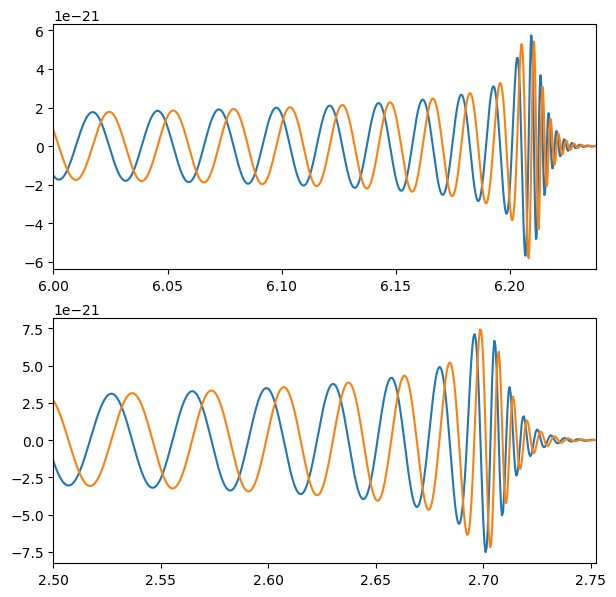

In [29]:
plt.figure(figsize=(7, 7))

plt.subplot(2,1,1)
plt.plot(df_1["time"],df_1["A_orth"])
plt.plot(df_1["time"],df_1["A_diag"])
plt.xlim(6,np.max(df_1["time"]))


plt.subplot(2,1,2)
plt.plot(df_2["time"],df_2["A_orth"])
plt.plot(df_2["time"],df_2["A_diag"])
plt.xlim(2.5,np.max(df_2["time"]))

plt.show()

## Matched Filtering

In [12]:
def Matched_filtering(GW_teo,GW_det):
    cross_correlation = numpy.zeros([len(GW_det)-len(GW_teo)])
    for i in range(len(GW_det)-len(GW_teo)):
        cross_correlation[i] = (GW_teo * GW_det[i:i+len(GW_teo)]).sum()
    return cross_correlation

In [1]:
from gwosc.datasets import event_gps
gps = event_gps('GW150914')
print(gps)

1126259462.4


In [3]:
segment = (int(gps)-250, int(gps)+250)
print(segment)

(1126259212, 1126259712)


In [5]:
from gwpy.timeseries import TimeSeries
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
print(ldata)

Fetched 1 URLs from gwosc.org for [1126259212 .. 1126259712))
Reading data... [Done]
TimeSeries([-1.01379686e-18, -1.01639133e-18, -9.75045497e-19,
            ..., -9.86060876e-19, -9.64730118e-19,
            -9.48295041e-19]
           unit: dimensionless,
           t0: 1126259212.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


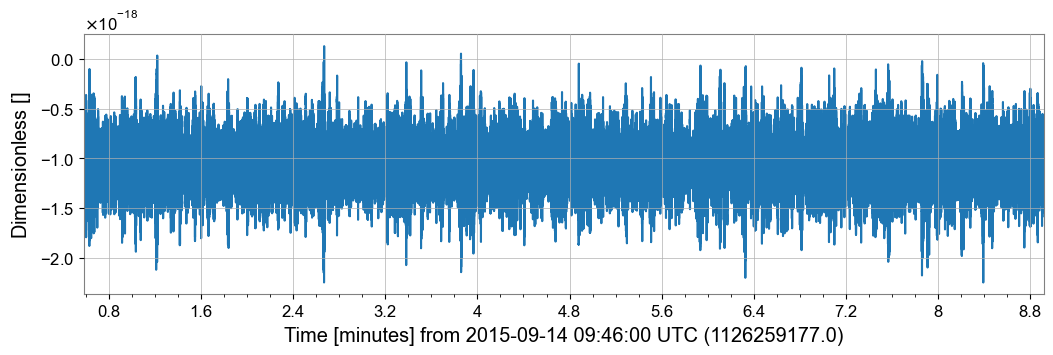

In [8]:
plot = ldata.plot()

In [12]:
ldata.write('GW150914_L1.txt', format='txt')